In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-potability/water_potability.csv


In [2]:
data = pd.read_csv('/kaggle/input/water-potability/water_potability.csv')

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

*We can see that the  Sulfate , Trihalomethanes and ph have some null value.*

We Can Use **Mean** values to fill all null values , or we can use **K Nearest Neighbor** to fill the NULL values.

In [5]:
data_copy = data

In [6]:
data_copy = data_copy.fillna(data_copy.mean())

In [7]:
data_copy.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='ph', ylabel='Count'>

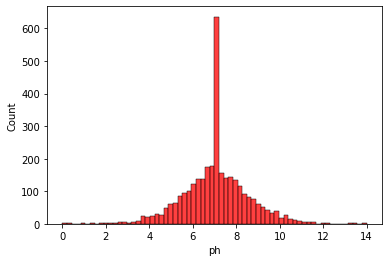

In [9]:
sns.histplot(data_copy.ph,color = 'red')

<AxesSubplot:xlabel='Hardness', ylabel='Count'>

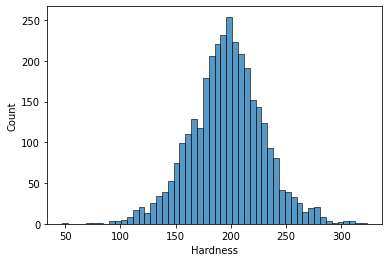

In [10]:
sns.histplot(data_copy.Hardness)

In [11]:
y = data_copy.Potability
min(y),max(y)

(0, 1)

In [12]:
data_copy.drop('Potability' ,axis = 1,inplace = True)

<AxesSubplot:>

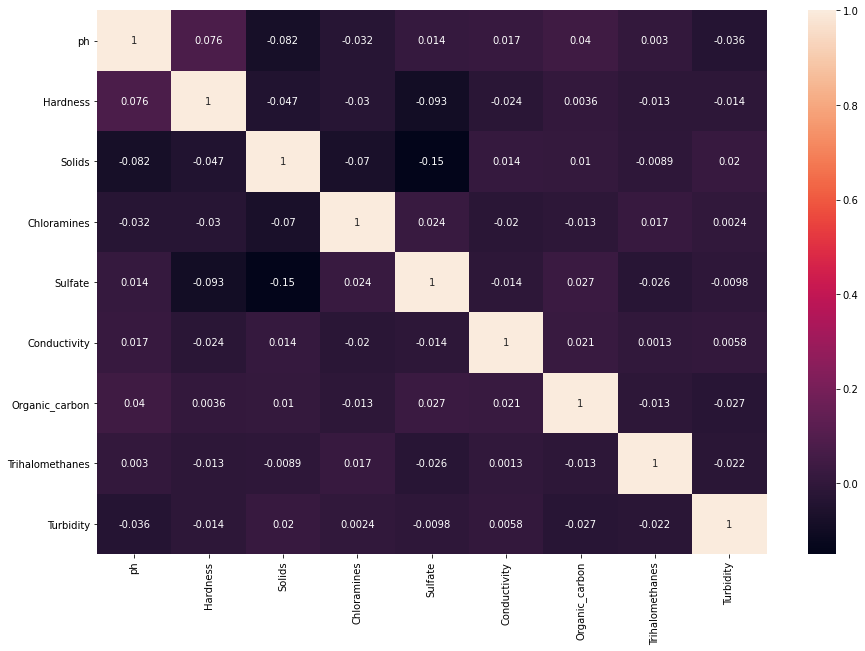

In [13]:
plt.figure(figsize = (15,10))
sns.heatmap(data_copy.corr(),annot = True)

In [14]:
len(data_copy)

3276

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_copy = scaler.fit_transform(data_copy)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data_copy,y.values,test_size = 0.2,random_state = 42)

In [17]:
np.max(x_train)

4.7078020868001635

In [18]:
from sklearn.svm import SVC
classifier = SVC()

In [19]:
from sklearn.naive_bayes import GaussianNB
classifier2 = GaussianNB()

In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier()

In [21]:
classifier.fit(x_train,y_train)
classifier2.fit(x_train,y_train)
classifier3.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
predict = classifier.predict(x_test)
predict2 = classifier2.predict(x_test)
predict3 = classifier3.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict)

In [24]:
cm2 = confusion_matrix(y_test,predict)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)*100

69.51219512195121

In [26]:
accuracy_score(y_test, predict2)*100

63.109756097560975

In [27]:
accuracy_score(y_test, predict3)*100

68.4451219512195

# **Using K nearest neighbor**
To fill missing data

In [28]:
from sklearn.impute import KNNImputer

In [29]:
y_m = data.Potability
data.drop('Potability',axis = 1,inplace = True)

In [30]:
cols = data.columns

In [31]:
def fill_na(col):
    imputer = KNNImputer(n_neighbors=10)
    da = imputer.fit_transform(data[col].values.reshape(-1,1))
    da = da.squeeze()
    return da

In [32]:
for col in data.columns:
    data[col] = fill_na(col)

In [33]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [34]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [35]:
data = scaler.fit_transform(data)

In [36]:
from sklearn.model_selection import train_test_split
x_train_,x_test_,y_train_,y_test_ = train_test_split(data,y_m.values,test_size = 0.2,random_state = 42)

In [37]:
classifier.fit(x_train_,y_train_)
classifier2.fit(x_train_,y_train_)
classifier3.fit(x_train_,y_train_)
predict_ = classifier.predict(x_test_)
predict2_ = classifier2.predict(x_test_)
predict3_ = classifier3.predict(x_test_)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_, predict_)*100

69.51219512195121

In [39]:
accuracy_score(y_test_, predict2_)*100

63.109756097560975

In [40]:
accuracy_score(y_test_, predict3_)*100

66.46341463414635

In [41]:
submi = pd.DataFrame(predict3_,columns = ['Potability'])
submi.to_csv('submission.csv',index = False)

In [42]:
!head 'submission.csv'

Potability
0
0
0
0
0
1
1
0
1
